In [44]:
#Import all the necessary modules
from pandas import read_csv
from sklearn.utils import resample
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
from sklearn import metrics
import sklearn.metrics as mt
from sklearn.cluster import AgglomerativeClustering 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [45]:
cars_df = pd.read_csv("cars-dataset.csv") # Read Dataset
cars_df.head(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190,3850,8.5,70,15.0


In [46]:
cars_df.info() , cars_df.size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


(None, 3184)

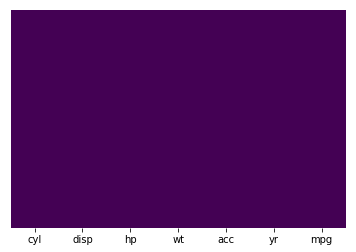

In [47]:
# remove special characters
cars_df.where(cars_df['hp'] == '?').dropna() 
cars_df = cars_df.replace('?', np.nan)
cars_df = cars_df.dropna()

cars_df['hp'] = cars_df['hp'].astype('float64')

# Remove non numeric data
if {'car name'}.issubset(cars_df.columns):   
    cars_df.drop(['car name'],axis=1,inplace=True)


    
sns.heatmap(cars_df.isnull(),yticklabels=False,cbar=False,cmap='viridis') # Check for null variables


In [48]:
cars_df.shape

(392, 7)

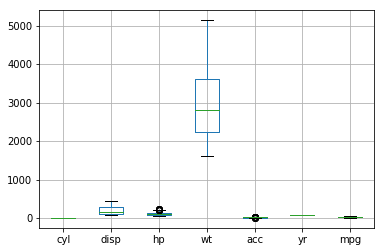

In [49]:
cars_df.boxplot() # Check for Outliers

In [50]:
cars_df.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


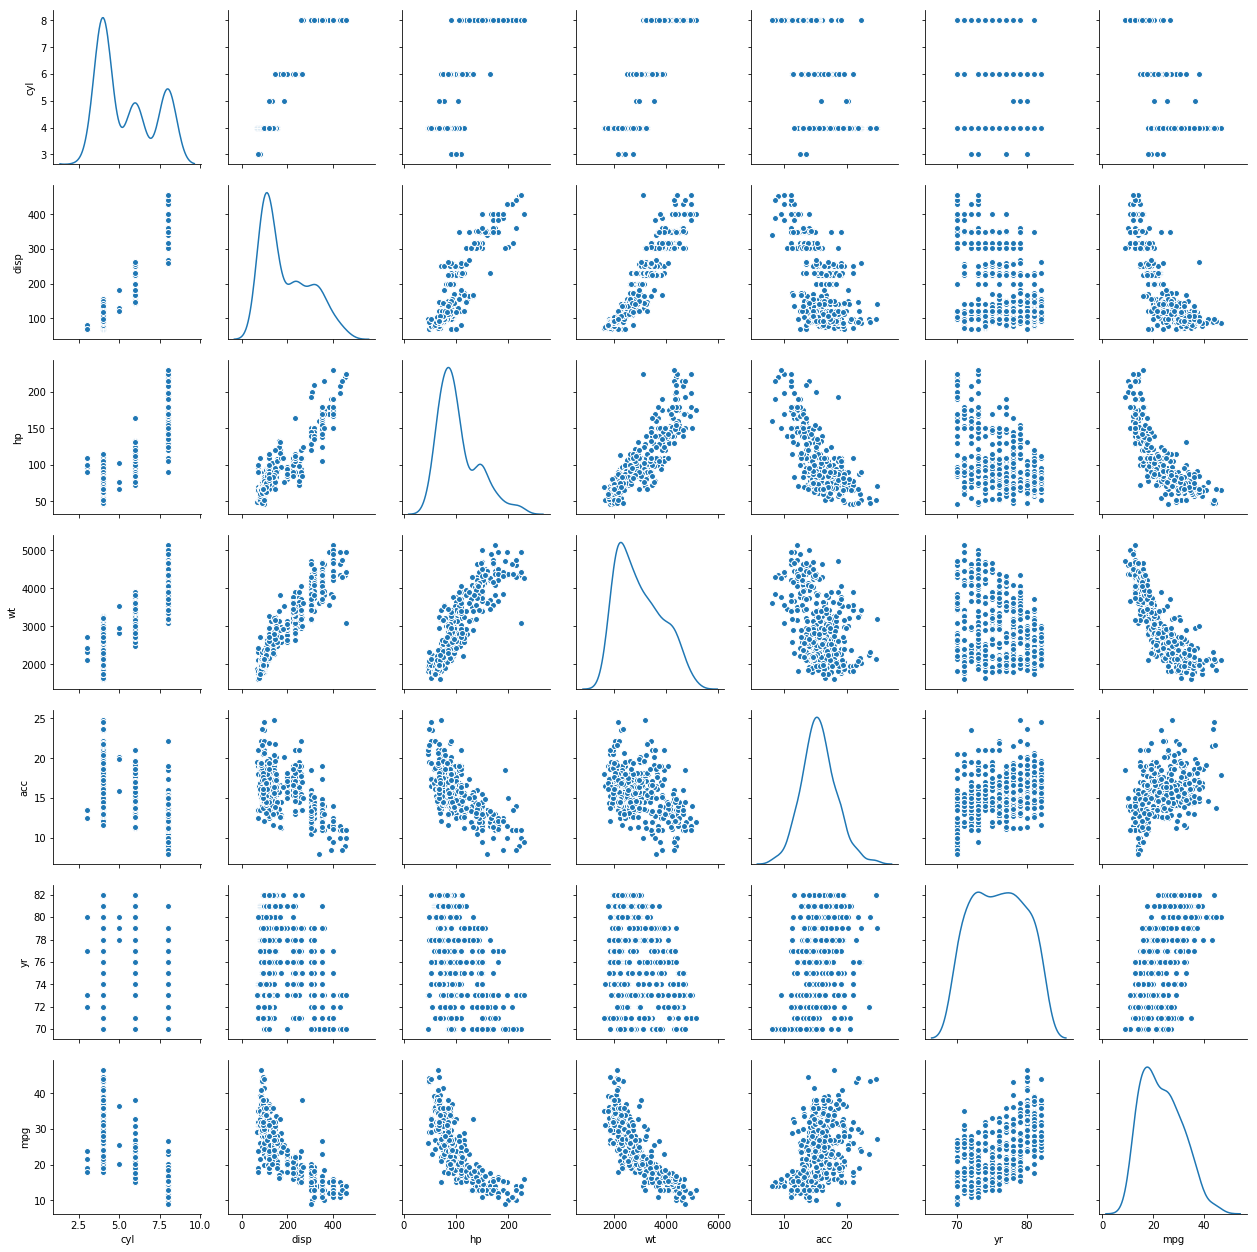

In [51]:
sns.pairplot(cars_df,diag_kind='kde')

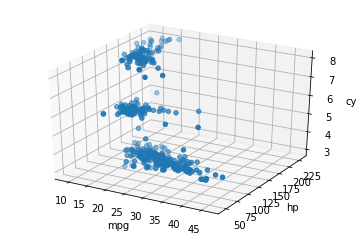

In [52]:
# There are atleast 3 gaussian visible. 

from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
threedee.scatter(cars_df.mpg, cars_df['hp'], cars_df['cyl'])
threedee.set_xlabel('mpg')
threedee.set_ylabel('hp')
threedee.set_zlabel('cyl')
plt.show()


In [53]:
# Lets find the elbow for probable # of clusters using Kmeans
from scipy.stats import zscore

cars_df = cars_df.apply(zscore)

cluster_range = range( 1, 8)   # expect 3 to four clusters from the pair panel visual inspection
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 3,random_state=1)
  clusters.fit(cars_df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,1,2744.000000
1,2,1272.900760
2,3,928.916349
3,4,725.327184
4,5,656.677142
5,6,603.281434
6,7,535.853506


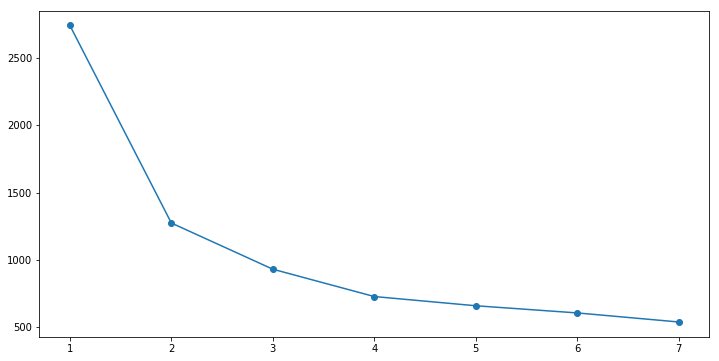

In [55]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [56]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(cars_df)
# Getting the cluster labels
labels = kmeans.predict(cars_df)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print(centroids) # From sci-kit learn
centroid_df = pd.DataFrame(centroids, columns = list(cars_df) )
centroid_df

Centroid values
[[ 0.41549305  0.30031222 -0.03530064  0.34141577  0.30633818  0.06662814
  -0.49265912]
 [-0.83170217 -0.79320521 -0.75919461 -0.78782597  0.38355974  1.1127382
   1.21012512]
 [ 1.48394702  1.48913886  1.50679413  1.39145217 -1.0759934  -0.68265368
  -1.1566489 ]
 [-0.85814365 -0.80247472 -0.55744679 -0.75309477  0.3207127  -0.63048922
   0.2066802 ]]


,cyl,disp,hp,wt,acc,yr,mpg
0,0.415493,0.300312,-0.035301,0.341416,0.306338,0.066628,-0.492659
1,-0.831702,-0.793205,-0.759195,-0.787826,0.383560,1.112738,1.210125
2,1.483947,1.489139,1.506794,1.391452,-1.075993,-0.682654,-1.156649
3,-0.858144,-0.802475,-0.557447,-0.753095,0.320713,-0.630489,0.206680


In [57]:
# No of clusters is 4.Lets try with Agglomerative Clustering

features = ['cyl','disp','hp','wt','acc','yr','mpg']

xy = cars_df

model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')

model.fit(xy)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=4, pooling_func=<function mean at 0x7fa3041a77b8>)

In [58]:

cars_df['labels'] = model.labels_

cars_df.groupby(["labels"]).count()

,cyl,disp,hp,wt,acc,yr,mpg
labels,,,,,,,
0,203,203,203,203,203,203,203
1,86,86,86,86,86,86,86
2,4,4,4,4,4,4,4
3,99,99,99,99,99,99,99


In [59]:
cars_clusters = cars_df.groupby(['labels'])

cars_df_groups=cars_clusters.head(392)#This creates a pandas dataframe groupby object

cars_df_groups  # Appending the Labels

,cyl,disp,hp,wt,acc,yr,mpg,labels
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.698638,3
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-1.083498,3
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.698638,3
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.955212,3
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.826925,3
5,1.483947,2.244637,2.433030,1.607198,-2.011120,-1.625315,-1.083498,3
6,1.483947,2.483848,3.005320,1.622523,-2.374052,-1.625315,-1.211785,3
7,1.483947,2.349890,2.875254,1.573013,-2.555517,-1.625315,-1.211785,3
8,1.483947,2.493416,3.135386,1.706218,-2.011120,-1.625315,-1.211785,3
9,1.483947,1.871469,2.224924,1.028406,-2.555517,-1.625315,-1.083498,3


In [60]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(cars_df_groups,'average')
c, coph_dists = cophenet(Z , pdist(cars_df_groups))

c

0.8527047745943491

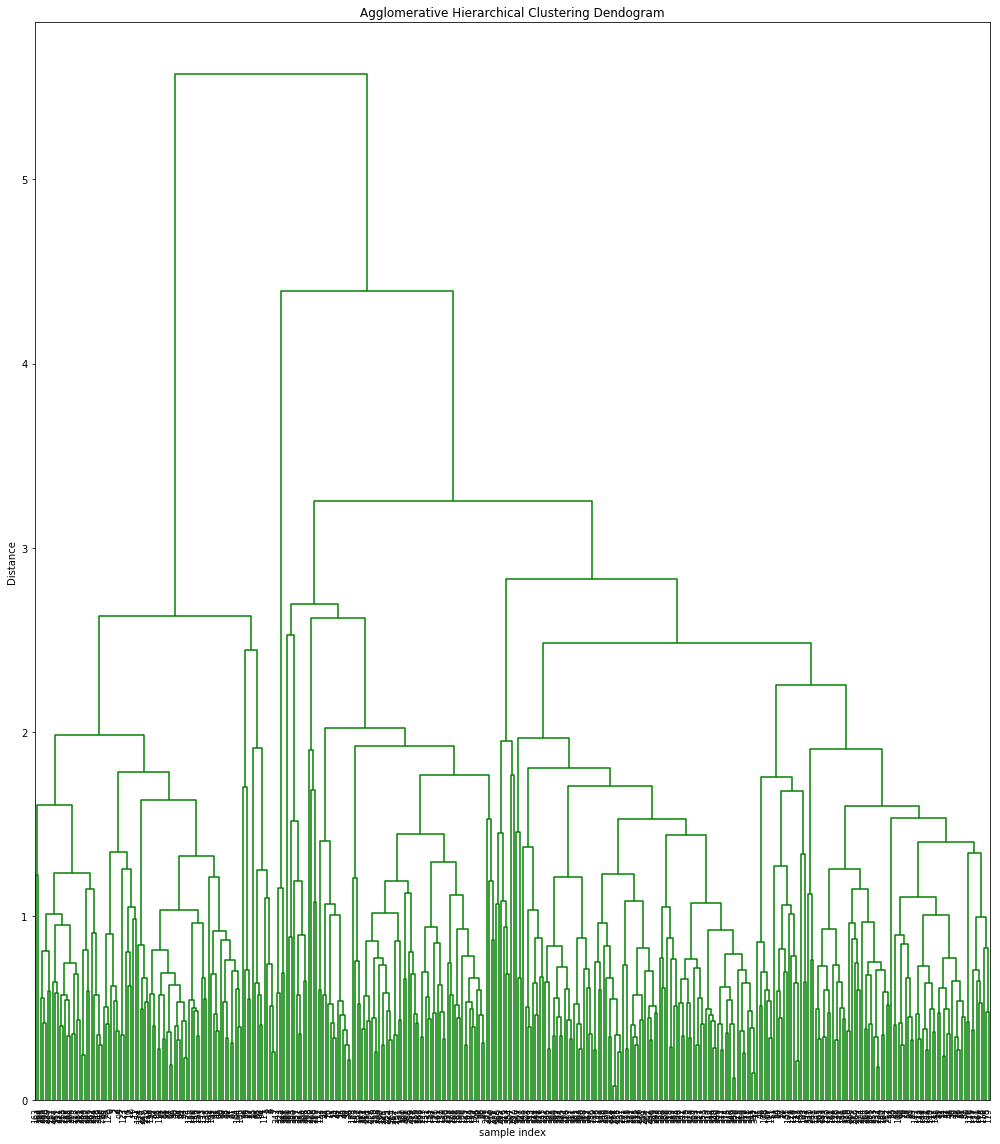

In [61]:
plt.figure(figsize=(14, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()


In [65]:
# Applying Linear regression on all the groups 

for labels in cars_df_groups['labels'].unique():
    cars_ds = cars_df_groups.where(cars_df_groups['labels'] == labels).dropna()
    Ym = cars_ds[['mpg']]
    Xm = cars_ds[['cyl','disp','hp','wt','acc','yr']]
    lms = LinearRegression()
    lms.fit(Xm,Ym)
    mpredictions = lms.predict( Xm)
    print('Coefficients: \n ', lms.coef_)
    print('MAE:', metrics.mean_absolute_error(Ym, mpredictions))
    print('MSE:', metrics.mean_squared_error(Ym, mpredictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(Ym, mpredictions)))
    r_squared = metrics.r2_score(Ym,mpredictions)
    print('RSquare for label:',labels,"-", r_squared)
    print('Reg Score',lms.score(Xm,Ym) )


Coefficients: 
  [[ 0.         -0.05872242 -0.0982939  -0.16421348 -0.15407129  0.19067494]]
MAE: 0.14237591019891435
MSE: 0.03433605807396158
RMSE: 0.18529991385308733
RSquare for label: 3 - 0.6080860607521307
Reg Score 0.6080860607521307
Coefficients: 
  [[ 0.9836597  -0.54391812 -0.35465684 -0.60704585 -0.07957138  0.40335816]]
MAE: 0.2848843946663042
MSE: 0.1403610659910459
RMSE: 0.3746479227101705
RSquare for label: 0 - 0.7095824169227115
Reg Score 0.7095824169227115
Coefficients: 
  [[ 0.46355729  0.15487197 -0.18818421 -0.46512935 -0.19389042  0.29840586]]
MAE: 0.22046806773310224
MSE: 0.10256022036334916
RMSE: 0.3202502464688344
RSquare for label: 1 - 0.5397194748376131
Reg Score 0.5397194748376131
Coefficients: 
  [[ 8.32667268e-17 -1.45679077e-02 -2.26314552e-02  7.18230168e-02
  -1.88223315e-01  2.92740514e-01]]
MAE: 0.0
MSE: 0.0
RMSE: 0.0
RSquare for label: 2 - 1.0
Reg Score 1.0
